In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./simple_loop/simple_loop")
outputfile = "./simple_loop/simple_loop.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


In [4]:
with open(outputfile, "r") as f: 
    content = f.read() 
    print(content)

.section .rodata
.align 4
.type	_IO_stdin_used_2000,@object
.globl _IO_stdin_used_2000
_IO_stdin_used_2000: # 2000 -- 2004
.LC2000:
	.byte 0x1
.LC2001:
	.byte 0x0
.LC2002:
	.byte 0x2
.LC2003:
	.byte 0x0

.section .data
.align 8
.LC4000:
	.byte 0x0
.LC4001:
	.byte 0x0
.LC4002:
	.byte 0x0
.LC4003:
	.byte 0x0
.LC4004:
	.byte 0x0
.LC4005:
	.byte 0x0
.LC4006:
	.byte 0x0
.LC4007:
	.byte 0x0
.LC4008:
	.quad .LC4008
.section .bss
.align 1
.type	completed.8060_4010,@object
.globl completed.8060_4010
completed.8060_4010: # 4010 -- 4011
.LC4010:
	.byte 0x0
.LC4011:
	.byte 0x0
.LC4012:
	.byte 0x0
.LC4013:
	.byte 0x0
.LC4014:
	.byte 0x0
.LC4015:
	.byte 0x0
.LC4016:
	.byte 0x0
.LC4017:
	.byte 0x0
.section .text
.align 16
	.text
.globl main
.type main, @function
main:
.L1129:
.LC1129:
	endbr64 
.LC112d:
	pushq %rbp
.LC112e:
	movq %rsp, %rbp
.LC1131:
	movl $1, -8(%rbp)
.LC1138:
	movl $0, -4(%rbp)
.LC113f:
	jmp .L1149
.L1141:
.LC1141:
	addl $1, -8(%rbp)
.LC1145:
	addl $1, -4(%rbp)
.L1149:
.LC1149:
	cmp

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


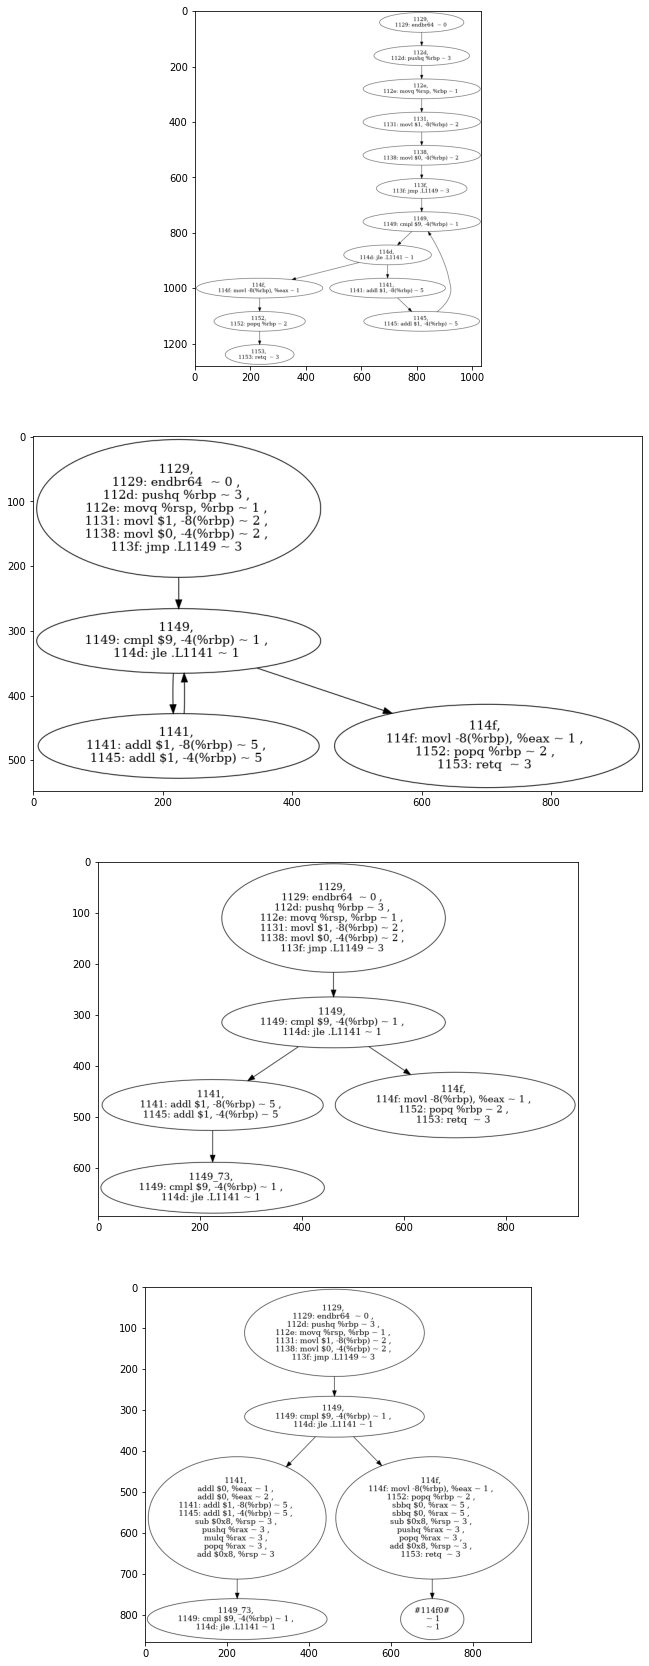

In [5]:
%autoreload 2 
from rwtools.nemesis.graph.utils import create_graph_structure, to_img
# from rwtools.nemesis.graph.utils import unwind_graph
from rwtools.nemesis.graph.balance import balance_branching_point

loader, rw = setup(binary, outputfile)

# list of all function names -- for each function seperately make a graph and balance it
function_names = loader.container.function_names

nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(4, 1, figsize=(30, 30))
# axs = [axs]
axs[0].imshow(to_img(graph))
                    
control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()

axs[1].imshow(to_img(graph))

control_flow_graph.unwind_graph()
# unwind_graph(graph)
# control_flow_graph.balance_branching_node('1130')

axs[2].imshow(to_img(graph))

target_node = control_flow_graph.get_node('1149')

balance_branching_point(control_flow_graph, target_node)
control_flow_graph.cleanup()

axs[3].imshow(to_img(graph))


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


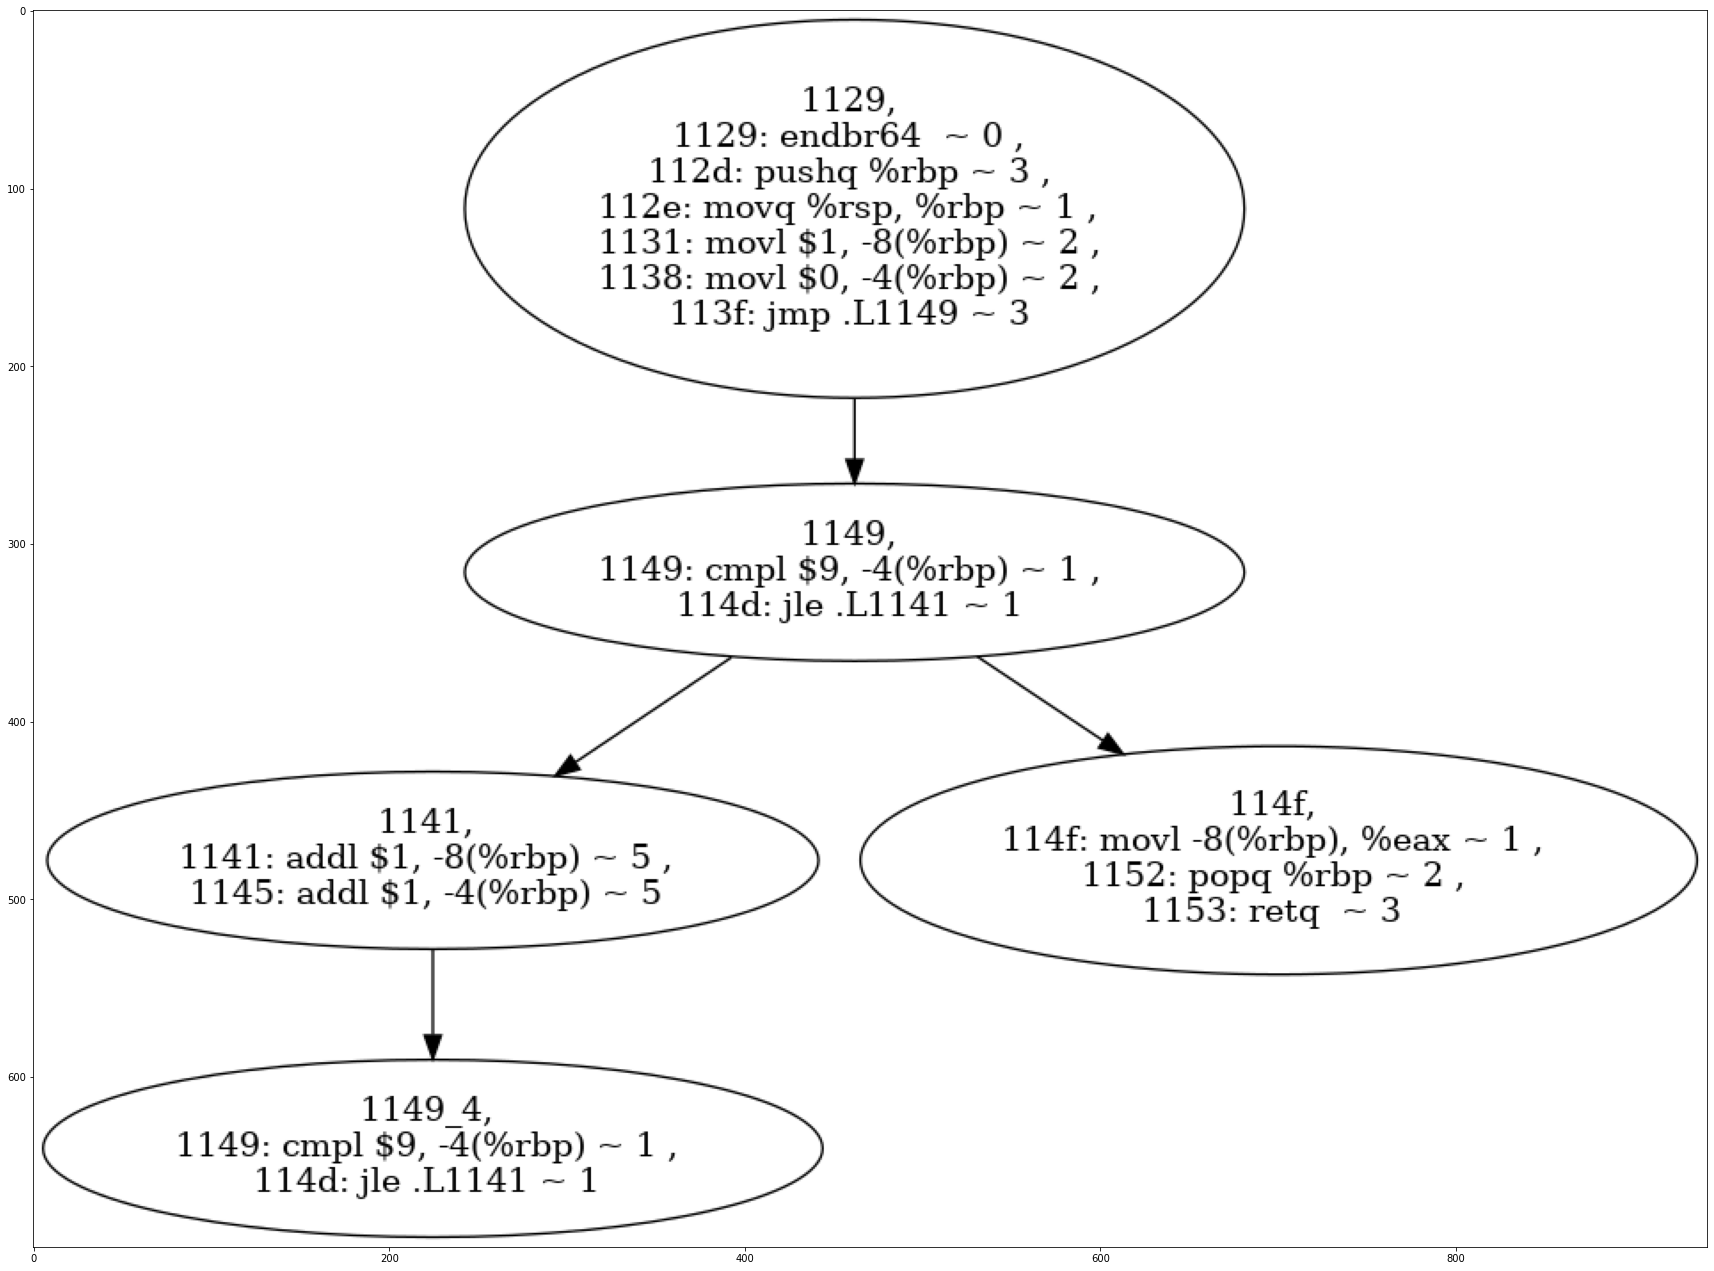

In [6]:
loader, rw = setup(binary, outputfile)
function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, 1, figsize=(30, 30))

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
control_flow_graph.unwind_graph()
target_node = control_flow_graph.get_node('1149')
axs.imshow(to_img(graph))


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


'./simple_loop/simple_loop_rw.s'

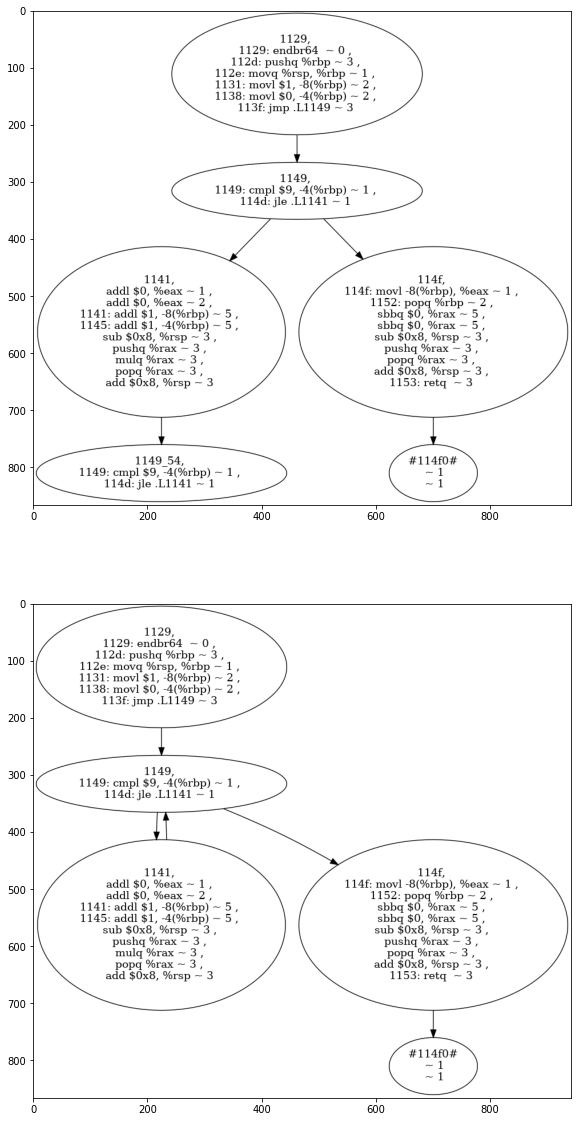

In [7]:
figs, axs = plt.subplots(2, figsize=(20,20))

loader, rw = setup(binary, "./simple_loop/simple_loop.s")
rw.dump()

loader, rw = setup(binary, "./simple_loop/simple_loop_rw.s")
rw.dump()


function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")

control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
control_flow_graph.unwind_graph()
target_node = control_flow_graph.get_node('1149')



target_node = control_flow_graph.get_node("1149")
balance_branching_point(control_flow_graph, target_node)
axs[0].imshow(to_img(graph))

control_flow_graph.restore_cycles()

axs[1].imshow(to_img(graph))
# plt.imshow(to_img(graph))

rw.dump()
rw.outfile

# Inserting a completely new new into a graph
Goal: insert a completely new node into the graph in such a way that RetroWrite will include it into the final code 

Main difficulty will be (i'm guessing) the control flow  (?) 

InstructionWrappers are initially contained inside Function classes. They are modified by inserting instructions before and after. They are never removed or deleted, but they are moved between nodes, and empty nodes are deleted (but this should be OK) 

Container contains a list of functions, we are currently working with one such function. 
Inside function, instructions are stored inside Function.cache


### Creating a new instructionWrapper
The InstructionWrapper class has an argument `instruction`, which is of type `capstone.CsInsn`. 
This data comes from the dissassembly process


In [8]:
target_fn = None
for _, fn in container.functions.items():
    if fn.name == "main":
        target_fn = fn

function_cache = target_fn.cache

for wrapper in function_cache: 
    print(str(wrapper))
    


NameError: name 'container' is not defined